In [1]:
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from pyod.models.pca import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from pyod.models.kpca import KPCA
import numpy as np


In [2]:
dataset = loadmat('../data/shuttle.mat')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset['X'], dataset['y'], train_size=0.6)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29458, 9), (19639, 9), (29458, 1), (19639, 1))

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print(y_train.shape, y_train.sum())
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

(29458, 1) 2098
[0 1] [27360  2098]


In [7]:
# calculate contamination rate
contamination_rate = y_train.sum() / len(y_train)


In [20]:
model = PCA(contamination=contamination_rate)
model.fit(X_train)

PCA(contamination=0.07108425555027496, copy=True, iterated_power='auto',
  n_components=None, n_selected_components=None, random_state=None,
  standardization=True, svd_solver='auto', tol=0.0, weighted=True,
  whiten=False)

In [28]:
print(model.explained_variance_.shape, model.explained_variance_)
print(model.explained_variance_ratio_.shape, model.explained_variance_ratio_)  


(9,) [2.95454967e+00 1.77508038e+00 1.31623630e+00 1.12658511e+00
 9.86825755e-01 8.39255016e-01 7.13899581e-04 6.87917392e-04
 3.71481967e-04]
(9,) [3.28272152e-01 1.97224458e-01 1.46243514e-01 1.25171874e-01
 1.09643584e-01 9.32473918e-02 7.93194830e-05 7.64326711e-05
 4.12743729e-05]


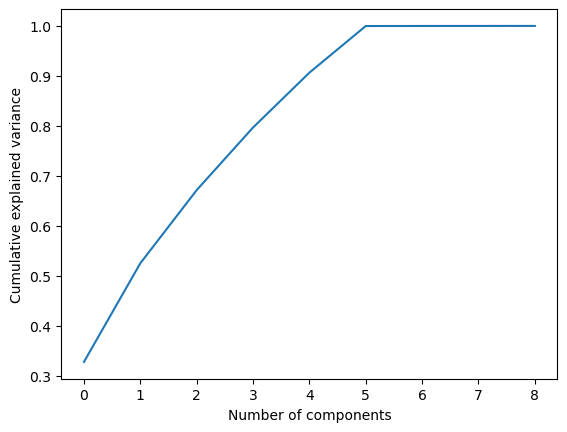

In [29]:
# plot the cumulative explained variance
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


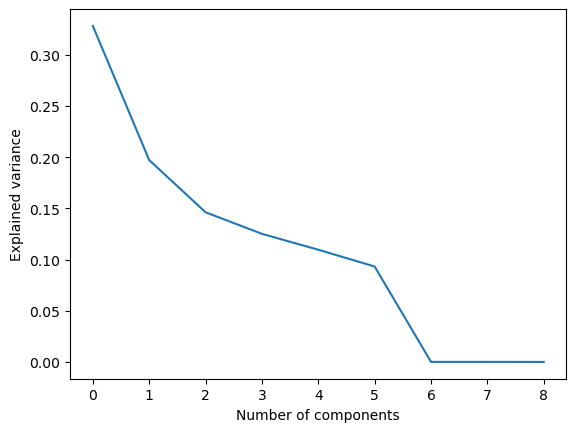

In [30]:
# plt the individual variances
plt.plot(model.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_train_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_test_pred))

Train balanced accuracy: 0.9742950358162699
Test balanced accuracy: 0.9731909523002858


In [ ]:
model = KPCA(contamination=contamination_rate)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_train_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_test_pred))